In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
import visualize
import world_generator
import evaluation
import projections

In [4]:
# enable animations to render inline.
# requires ffmpeg to be installed (`sudo apt install ffmpeg`)
rc('animation', html='html5')

In [5]:
N_a, M_a, g_bas = world_generator.generate_world(num_regions=256, spread_rate=0.2, self_spread_rate=2.0)
# N_a, M_a, g_ba

In [6]:
N_a.shape, M_a.shape, [g_ba.shape for g_ba in g_bas]

((256,), (256, 256), [(64, 256), (16, 64), (4, 16), (1, 4)])

# No Lock-Down

In [7]:
results = evaluation.evaluate(
    M_a,
    projection_method=projections.Projections().sub_matrix_eigenvector,
    g_bas=g_bas,
    N_a_0=N_a,
    num_steps=200,
    intervention_strategy=False)

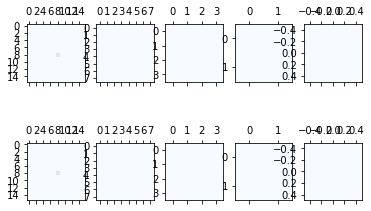

In [8]:
anim = visualize.animate_results(results)

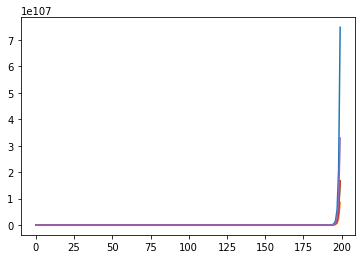

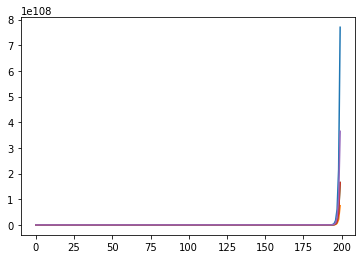

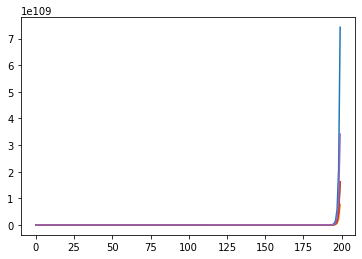

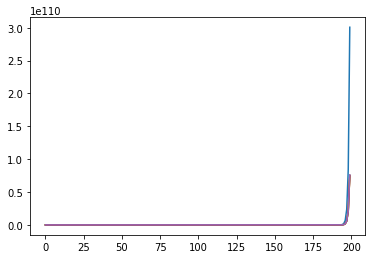

In [9]:
for i in range(len(g_bas)):
    visualize.plot_case_counts(results['N_bs'][i], results['N_bs'][i+1], 0, g_bas[i])

In [11]:
# anim

# Debugging M_b

In [18]:
results['M_bs'][0] == M_a

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [17]:
M_a.shape

(256, 256)

In [19]:
results['M_bs'][1].shape

(64, 64)

In [29]:
M_bs_1, g_ab = projections.Projections().sub_matrix_eigenvector(M_a, g_bas[0], return_g_ab=True)

In [30]:
results['M_bs'][1] == M_bs_1

array([[False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True, False, False]])

In [31]:
results['M_bs'][1].shape, M_bs_1.shape

((64, 64), (64, 64))

In [25]:
g_bas[0].shape

(64, 256)

In [34]:
g_ab

array([[0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25]])

In [37]:
g_bas[0]

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])